In [1]:
#解析的方法　正規方程式を解く

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 学習データ(x軸)を生成
x = np.random.rand(100,1)

#データをみてみる
x

array([[0.44670935],
       [0.0573711 ],
       [0.45047105],
       [0.50824649],
       [0.82723932],
       [0.33667565],
       [0.30816823],
       [0.25332643],
       [0.74313348],
       [0.07787414],
       [0.31862619],
       [0.58686079],
       [0.46646634],
       [0.60836144],
       [0.87538979],
       [0.90968429],
       [0.92551347],
       [0.54083905],
       [0.57573263],
       [0.97564071],
       [0.6893223 ],
       [0.47535996],
       [0.74109165],
       [0.57973636],
       [0.3838701 ],
       [0.81797212],
       [0.19974996],
       [0.10618516],
       [0.88054442],
       [0.62823335],
       [0.59874012],
       [0.22243669],
       [0.98144974],
       [0.12251224],
       [0.17452983],
       [0.62784846],
       [0.29945618],
       [0.38673744],
       [0.27351559],
       [0.7264922 ],
       [0.33737811],
       [0.40476835],
       [0.22413418],
       [0.56181175],
       [0.60068225],
       [0.4851224 ],
       [0.87307284],
       [0.026

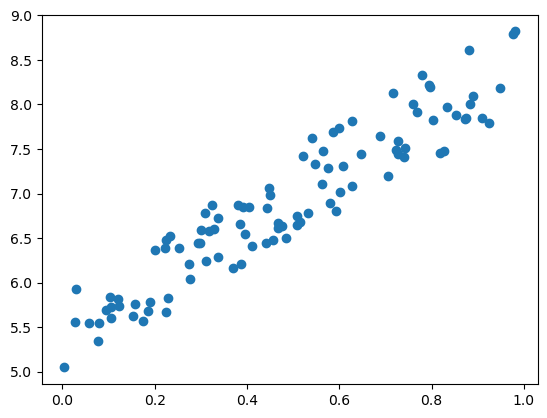

In [3]:
# 学習データ(y軸)を生成
y = 5 + 3 * x + np.random.rand(100,1)

# 生成したデータを表示
plt.scatter(x,y)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# fit関数でLinearRegressionの学習を行う
lin_reg = LinearRegression().fit(x,y.ravel())

# y.ravel() : 多次元配列を1次元の配列に変換する
# 例：yy=np.random.rand(100,3)
# yy[0:5]
# yy.ravel()[0:10]

y.shape # 100行1列のデータ

(100, 1)

In [6]:
# 1次元の配列に変換する
y.ravel().shape

(100,)

In [7]:
# intercept_: 切片
# coef_: 傾き

# LinearRegressionの実行結果を表示する
# 学習データ y = 5 + 3 * x + randomで設定した切片、傾きに近い値を得ることができた。
lin_reg.intercept_,lin_reg.coef_

(5.402503221283639, array([3.08005336]))

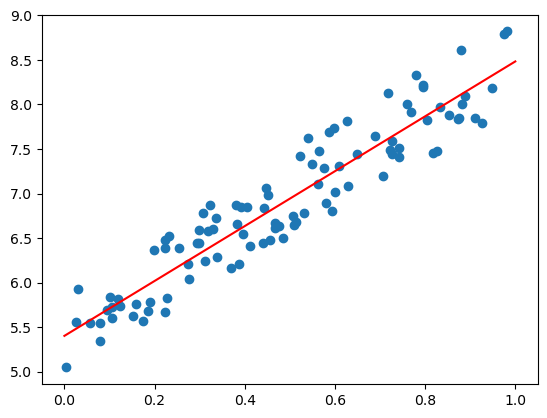

In [8]:
# LinearRegressionで取得した直線を描画　(正規方程式を用いた描画)
x_new = np.array([[0],[1]])
plt.plot(x_new,lin_reg.intercept_ + lin_reg.coef_ * x_new,'red')
plt.scatter(x,y)

In [9]:
# 以下、勾配降下法で傾きと切片を取得する

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

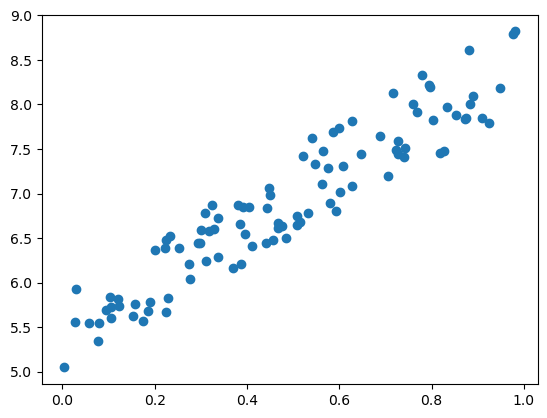

In [10]:
# 学習データを再表示

plt.scatter(x,y)

In [11]:
from sklearn.linear_model import SGDRegressor

# SGDRegressorにより学習
sgd_reg = SGDRegressor(max_iter=100).fit(x,y.ravel())

# intercept_: 切片
# coef_: 傾き
# SGDRegressorの学習結果を表示
sgd_reg.intercept_, sgd_reg.coef_

(array([5.48065879]), array([2.87113564]))

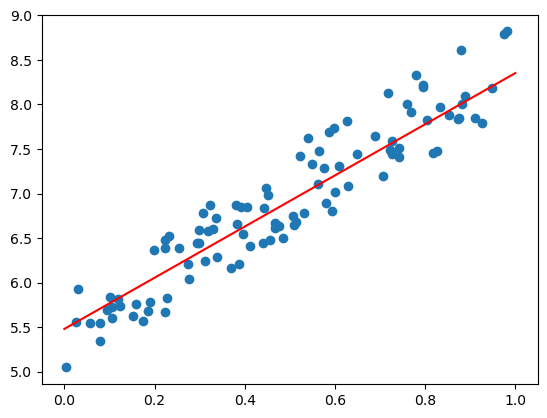

In [12]:
# SGDRegressorで取得した直線を描画　(降下法を用いた描画)
x_new = np.array([[0],[1]])
plt.plot(x_new,sgd_reg.intercept_ + sgd_reg.coef_ * x_new,'red')
plt.scatter(x,y)

In [13]:
# 学習率(eta0)の影響をみてみる　デフォルトは0.01
# 学習率：どの程度の大きさでパラメータの更新を行うかを決めるもの。
# 例えば　eta0=0.0001にしてみる

# SGDRegressorにより学習
sgd_reg_00001 = SGDRegressor(eta0=0.0001,max_iter=100).fit(x,y.ravel())

# SGDRegressorの学習結果を表示
# 学習率が低すぎるので、切片、傾きが想定よりも低く、適切に学習を行えていないことがわかる。
sgd_reg_00001.intercept_,sgd_reg_00001.coef_

C:\Users\kkrsk\miniconda3\envs\ML_Youtube\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(array([0.84529887]), array([0.43297572]))

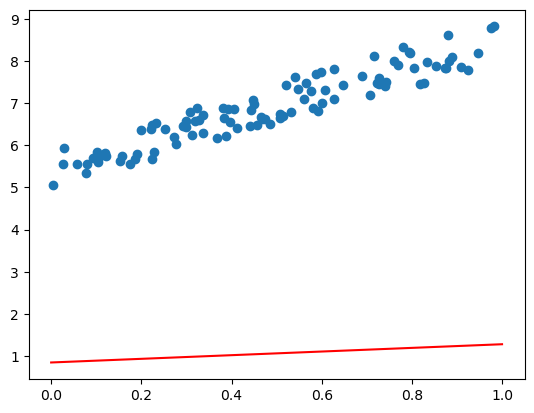

In [14]:
# 不適切な学習率による、SGDRegressorで取得した直線を描画
x_new = np.array([[0],[1]])
plt.plot(x_new,sgd_reg_00001.intercept_ + sgd_reg_00001.coef_ * x_new,'red')
plt.scatter(x,y)